In [30]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("D:\\Stock_Anlysis\\btc_data.csv", parse_dates=['Date'])


In [31]:
data['Date']= pd.to_datetime(data['Date'], utc= True)

data['Date']= data['Date'].dt.date




In [32]:
data.set_index('Date')

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,2.105680e+07
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,3.448320e+07
2014-09-19,394.795990,394.795990,427.834992,384.532013,424.102997,3.791970e+07
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,3.686360e+07
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084992,2.658010e+07
...,...,...,...,...,...,...
2024-11-23,97777.281250,97777.281250,99014.679690,97232.890630,99006.742190,4.441464e+10
2024-11-24,98013.820310,98013.820310,98647.179690,95788.078130,97778.093750,5.171202e+10
2024-11-25,93102.296880,93102.296880,98935.031250,92642.914060,98033.445310,8.090946e+10


In [34]:
# data['value_diff'] = data['Adj Close'].diff().dropna()
data['log_diff'] = np.log(data['Adj Close']).diff().dropna()

In [36]:
data['log_diff'].isna().sum()

data.dropna(subset=['log_diff'], inplace=True)

In [23]:
# data['value_diff'].isna().sum()


# data.dropna(subset=['value_diff'], inplace=True)

In [24]:
# data['value_diff'].isna().sum()

0

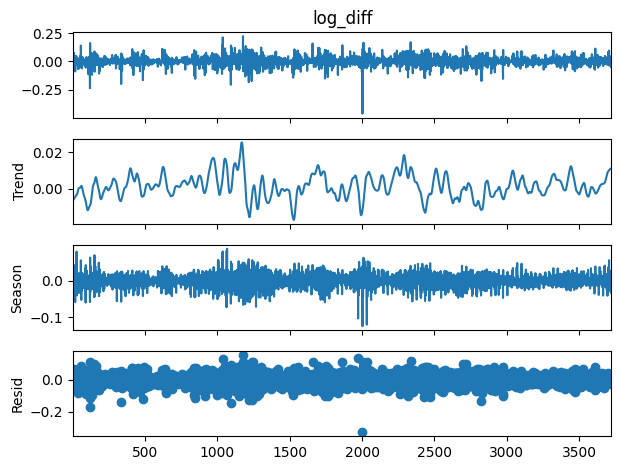

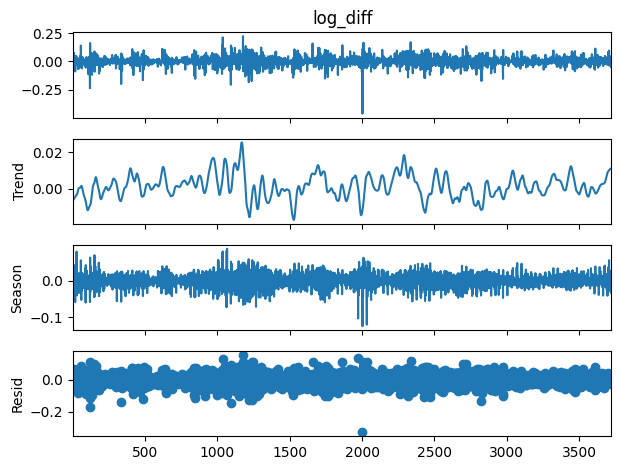

In [38]:
from statsmodels.tsa.seasonal import STL

stl_mod= STL(data['log_diff'], period=30)

ft_mod=stl_mod.fit()

rss=ft_mod.resid

ft_mod.plot()

<Axes: >

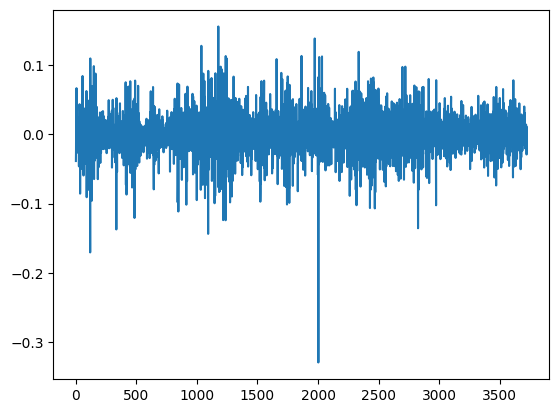

In [41]:
rss.plot()

In [39]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test to check stationarity
result = adfuller(data['log_diff'])
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

ADF Statistic: -18.53218312253334, p-value: 2.102451927887542e-30


In [42]:
import statsmodels.api as sm

# Perform the Ljung-Box test
# Assuming `residuals` is the residuals from your STL decomposition
ljung_box_test = sm.stats.acorr_ljungbox(rss,lags=[10], return_df=True)

# Print the results
print(ljung_box_test)


     lb_stat     lb_pvalue
10  73.82812  8.040660e-12


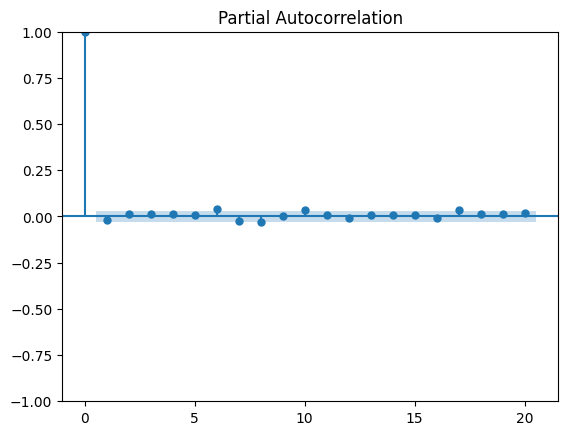

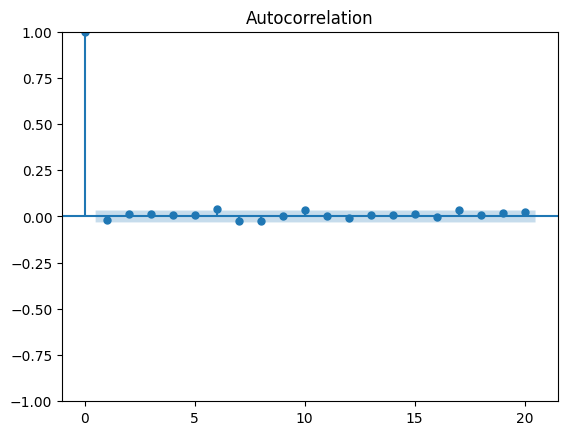

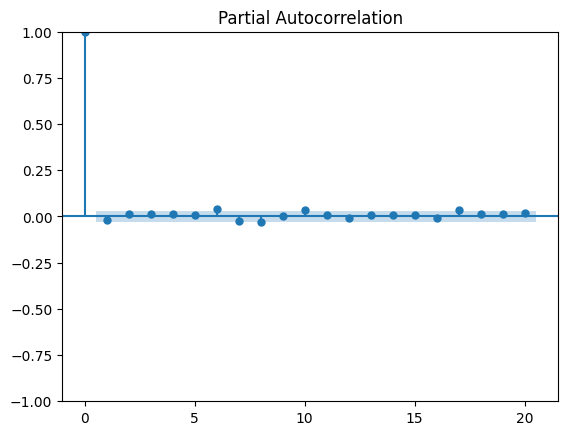

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['log_diff'], lags=20)
plot_pacf(data['log_diff'], lags=20)



In [4]:
data['value_diff'] = data['Adj Close'].diff().dropna()

data.dropna(subset=['value_diff'], inplace=True)

<Axes: >

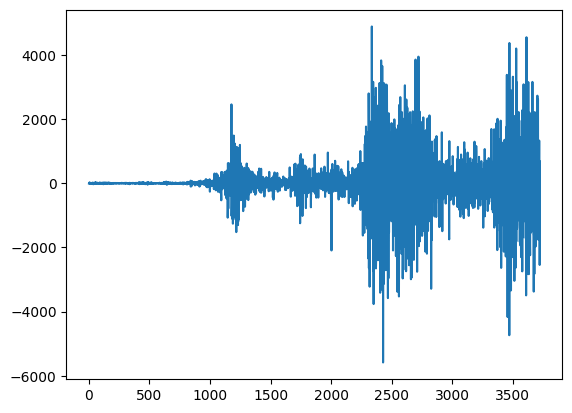

In [8]:
diff_Model= STL(data['value_diff'], period= 30)

ftt_diff_model=diff_Model.fit()

first_dif_res=ftt_diff_model.resid

first_dif_res.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller
ad_test= adfuller(data['value_diff'].dropna())
print('ADF Statistic: %f' % ad_test[0], 'p-value:', ad_test[1])

ADF Statistic: -8.427970 p-value: 1.9039770071389477e-13


In [10]:
from pmdarima import auto_arima

model = auto_arima(data['value_diff'], seasonal=False, trace=True)
model.fit(data ['value_diff'])
forecast = model.predict(n_periods=30)




Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=61416.269, Time=1.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=61421.004, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=61418.958, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=61419.190, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=61416.058, Time=0.81 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=61417.902, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=61418.484, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=61416.814, Time=1.12 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=61419.907, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=61419.653, Time=0.16 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=61418.281, Time=1.39 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=61418.947, Time=0.69 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.030 seconds


C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
from statsmodels.tsa.stattools import adfuller

resultssss = adfuller(data['value_diff'])
print(f"ADF Statistic: {resultssss[0]}, p-value: {resultssss[1]}")

ADF Statistic: -8.427970130026415, p-value: 1.9039770071389477e-13


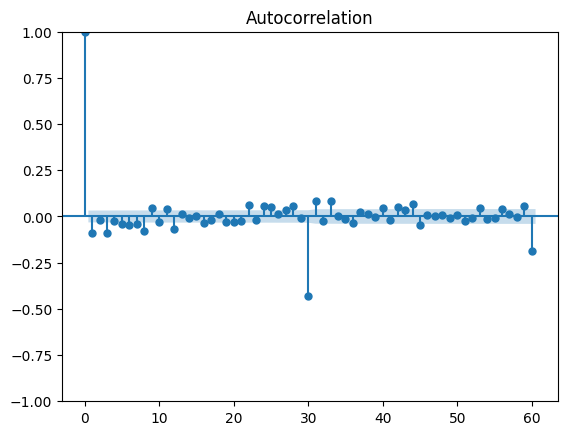

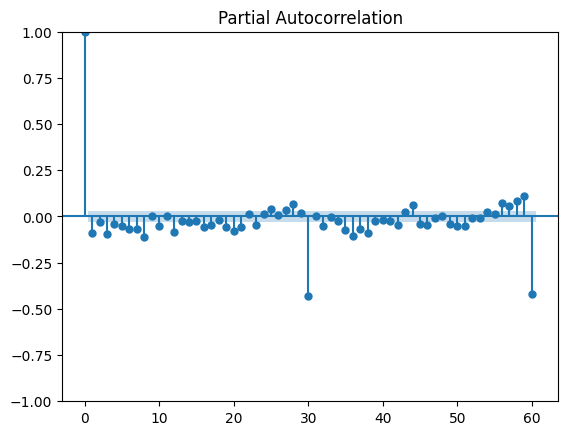

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(first_dif_res, lags=60)
plot_pacf(first_dif_res, lags=60)
plt.show()


                               SARIMAX Results                                
Dep. Variable:             value_diff   No. Observations:                   97
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -786.008
Date:                Tue, 24 Dec 2024   AIC                           1580.016
Time:                        12:40:55   BIC                           1590.315
Sample:                    09-30-2014   HQIC                          1584.181
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0402      0.281     -0.143      0.886      -0.591       0.510
ma.L1          0.0531      0.289      0.184      0.854      -0.514       0.620
ma.L2         -0.3635      0.114     -3.200      0.0

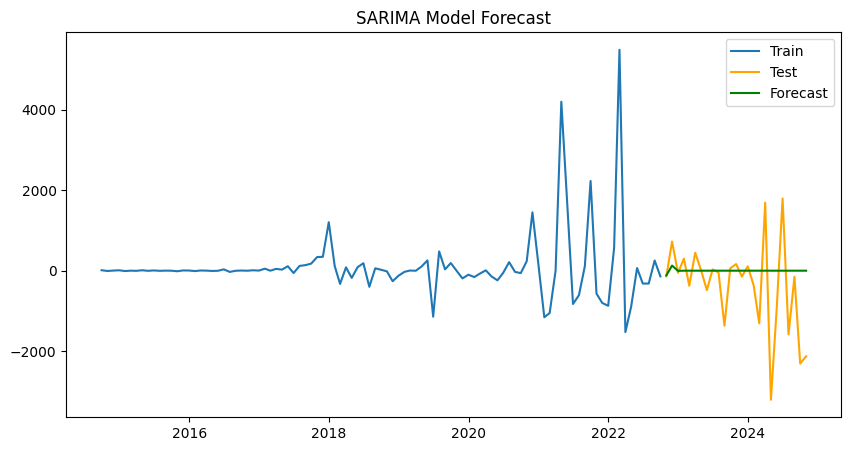

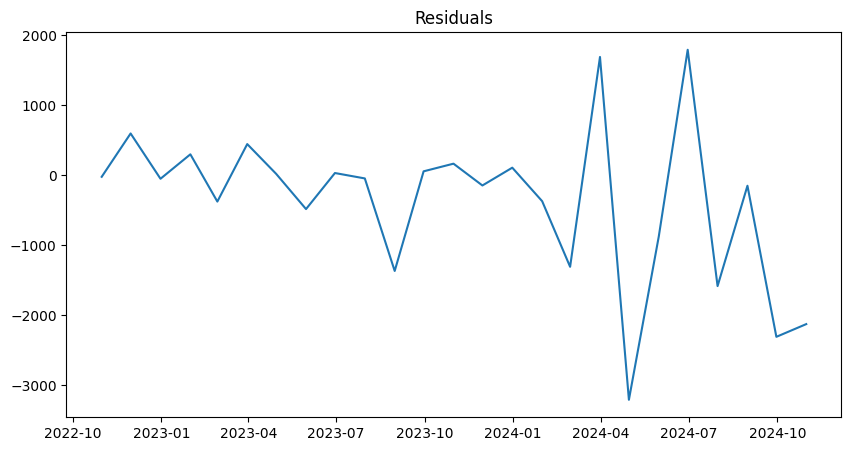

In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load your data

 # Replace with your file path
series = data['value_diff']  # The stationary series after differencing

# Split data into training and testing
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# SARIMA Model Setup
model = SARIMAX(train, 
                order=(1, 0, 2),  # Adjust p, d, q based on earlier findings
                seasonal_order=(0, 0, 0, 12))  # Seasonal P, D, Q, s (period=30)
results = model.fit(disp=False)

print(results.summary())

# Forecast on test data
forecast = results.forecast(steps=len(test))



mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test, forecast)

# Evaluate the model
print(f"SARIMA Test MSE: {mse:.4f}")
print(f"SARIMA Test MAE: {mae:.4f}")
print(f"SARIMA Test RMSE: {rmse:.4f}")
print(f"SARIMA Test MAPE: {mape:.4f}")



# Plot results
plt.figure(figsize=(10, 5))
plt.plot(train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="green")
plt.title("SARIMA Model Forecast")
plt.legend()
plt.show()

residuals = test - forecast

plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title("Residuals")
plt.show()


In [256]:
from pmdarima import auto_arima

model = auto_arima(data['value_diff_2'], seasonal=False, trace=True)
model.fit(data ['value_diff_2'])
forecast = model.predict(n_periods=30)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=7.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=64097.523, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=62873.044, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=1.90 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=62449.709, Time=0.87 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=62177.953, Time=0.92 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=62010.891, Time=1.44 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=61930.723, Time=3.15 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=28.89 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=11.15 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=61932.723, Time=2.14 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 57.860 seconds


C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [204]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_diff'] = scaler.fit_transform(data['value_diff_2'].values.reshape(-1, 1))

In [205]:
def create_sequence(data, sequence_lenght):
    sequence = []
    for i in range(len(data) - sequence_lenght + 1):
        sequence.append(data[i:i+sequence_lenght])
    return sequence
    
sequence_lenght= 60

In [206]:
# Create sequences using 'scaled_diff' instead of 'Adj Close'
scaled_col= data['scaled_diff'].values


X = create_sequence(scaled_col, sequence_lenght)


X = np.array(X)

# Prepare X for LSTM (reshape to (samples, time steps, features))
X = X.reshape(X.shape[0], X.shape[1], 1)

# The target variable (next day's price movement, shifted by 1 day)
y = data['scaled_diff'].shift(-1).dropna().values

# Ensure that y matches the length of X (after shifting, drop the last value)
y = y[:len(X)] 




In [ ]:
!pip install tensorflow

C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0463 - val_loss: 0.0066
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0030 - val_loss: 0.0066
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0034 - val_loss: 0.0066
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0028 - val_loss: 0.0065
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0031 - val_loss: 0.0066
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0032 - val_loss: 0.0066
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0026 - val_loss: 0.0065
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0028 - val_loss: 0.0065
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0034 - val_loss: 0.0065
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0031 - val_loss: 0.0065
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Mean Squared Error: 0.006542605597354437


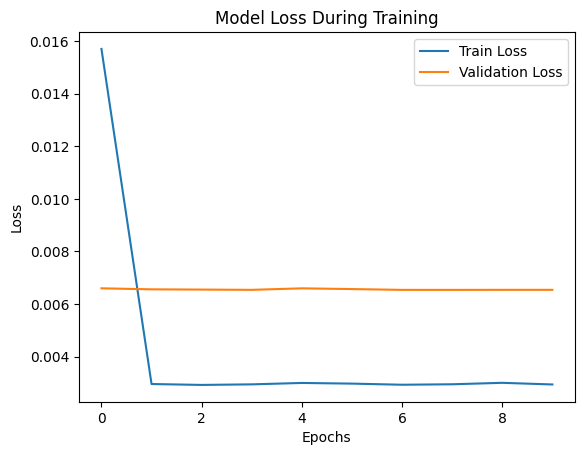

In [210]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Split the data into training and testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the LSTM model
model = Sequential()

# Add LSTM layers (you can adjust the units, layers, etc.)
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Add Dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, you can plot the loss curve over epochs to monitor training progress
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


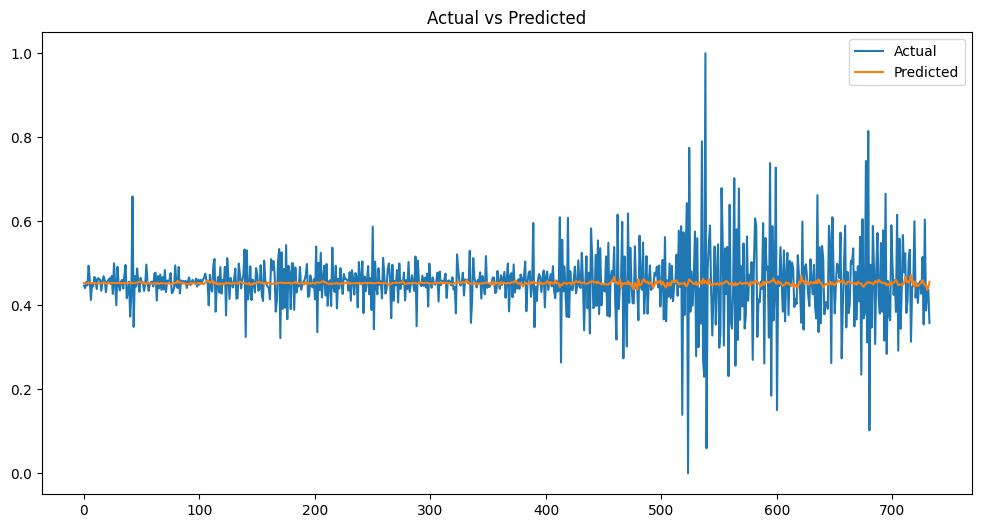

In [211]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()


In [29]:
import pandas as pd

# Load data
df = pd.read_csv("D:\\Stock_Anlysis\\btc_data.csv",parse_dates=['Date'])

# Feature Engineering
df['Price_Range'] = df['High'] - df['Low']
df['Net_Change'] = df['Close'] - df['Open']
df['Normalized_Range'] = (df['High'] - df['Low']) / df['Close']
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Lagged Features
# df['Adj_Close_Lag1'] = df['Adj Close'].shift(1)
# df['Volume_Lag1'] = df['Volume'].shift(1)

# Drop NaNs after lagged features
df = df.dropna()

# Check for stationarity (use ADF test) and apply differencing/log transform if needed


In [30]:
df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Price_Range', 'Net_Change', 'Normalized_Range', 'Day_of_Week', 'Month',
       'Year'],
      dtype='object')

In [24]:
columns_to_test = ['Diff_Adj Close', 'Diff_High', 'Diff_Low', 'Diff_Open', 'Diff_Volume']
for cols in columns_to_test:
    df.dropna(subset=[cols], inplace=True)

In [11]:
import numpy as np
columns_to_test = ['Adj Close', 'High', 'Low', 'Open', 'Volume']

for col in columns_to_test:
    df['Diff_' + col] = df[col] - df[col].shift(1)



In [13]:
from statsmodels.tsa.stattools import adfuller

# List of columns to test
columns_to_test = ['Diff_Adj Close', 'Diff_High', 'Diff_Low', 'Diff_Open', 'Diff_Volume']

# ADF test for each column
for col in columns_to_test:
    adf_result = adfuller(df[col].dropna())  # Drop NaN values
    print(f"{col} ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}")
    if adf_result[1] < 0.05:
        print(f"{col} is stationary (p < 0.05)")
    else:
        print(f"{col} is not stationary (p >= 0.05)")


Diff_Adj Close ADF Statistic: -8.426849325609222, p-value: 1.9165824517544044e-13
Diff_Adj Close is stationary (p < 0.05)
Diff_High ADF Statistic: -8.460231134029645, p-value: 1.57456274958897e-13
Diff_High is stationary (p < 0.05)
Diff_Low ADF Statistic: -8.696339264058562, p-value: 3.915749434448249e-14
Diff_Low is stationary (p < 0.05)
Diff_Open ADF Statistic: -8.82589513458175, p-value: 1.8240482727865885e-14
Diff_Open is stationary (p < 0.05)
Diff_Volume ADF Statistic: -15.552252337913837, p-value: 2.0928172871638616e-28
Diff_Volume is stationary (p < 0.05)
